In [4]:
# Setup
F.<w> = GF(2^8)
R.<x> = F[]
n = 15
k = 5
a = vector(F, [w^i for i in range(n)])
v = vector(F, [w^i for i in range(1,n+1)]) # can be randomly chosen

GRS = codes.GeneralizedReedSolomonCode(a,k,v)
E1 = codes.encoders.GRSEvaluationPolynomialEncoder(GRS)
E2 = codes.encoders.GRSEvaluationVectorEncoder(GRS)

msg = random_vector(F, k)
msg_poly = sum([msg[i]*x^i for i in range(k)])
cword1 = E1.encode(msg_poly)
cword2 = E2.encode(msg)

print(cword1 == cword2)


True


In [15]:
# Unique decoding

D1 = codes.decoders.GRSBerlekampWelchDecoder(GRS)
D2 = codes.decoders.GRSGaoDecoder(GRS)

t = floor((n-k)/2)
Chan = channels.StaticErrorRateChannel(F^n, t)
rword = Chan(cword1)

print(D2.decode_to_code(rword) == cword1)
print(D2.decode_to_message(rword) == msg_poly)

s = 1
t = floor((n-k-s)/2)+1
Chan1 = channels.ErrorErasureChannel(F^n, t, s)
rword1 = Chan1(cword1)
print(rword1)


D3 = codes.decoders.GRSErrorErasureDecoder(GRS)
print(D3.decoding_radius(s))
# print(D3.decode_to_code(rword1) == cword1)

# codewords = D3.decode_to_code(rword1[0])
# print(len(codewords))


True
True
((w^7 + w^6 + w^5 + w^4 + w^3 + w^2 + w + 1, w^6 + w^5 + w^4 + w^2, w, w^7 + w^5 + w^4 + w^2 + 1, w^3 + 1, w^7 + w^5 + w, w^7 + w^6 + w^5 + w + 1, w^7 + w^5, w^6 + w^3 + w^2 + 1, w^7 + w^6 + w^5 + w^4 + w^2, w^7 + w^6 + w^3, 0, w^7 + w^6 + w^4 + w^3 + 1, w^6 + w^5 + w^2 + 1, w^5 + w^4), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0))
4


In [17]:
F.<w> = GF(5)
R.<x,y> = F[]

p = 1 + x + y - x^2 - y^2 - 2*x^2*y \
    + x*y^2 - y^3 + x^4 -2*x^3*y - x^2*y^2 + 2*x*y^3

p.factor()
p(x+1,y+2)


x^4 - 2*x^3*y - x^2*y^2 + 2*x*y^3 - 2*x^2*y + x*y^2 + y^3

In [1]:
# Auxiliary functions
def Nsd(s,d):
    return sum([d+1-i*s for i in range(floor(d/s)+1)])

def find_delta(m,n,k):
    d = k-1
    while Nsd(k-1,d) <= n*m*(m+1)/2:
        d += 1
    return d    

find_delta(4,15,6)

36

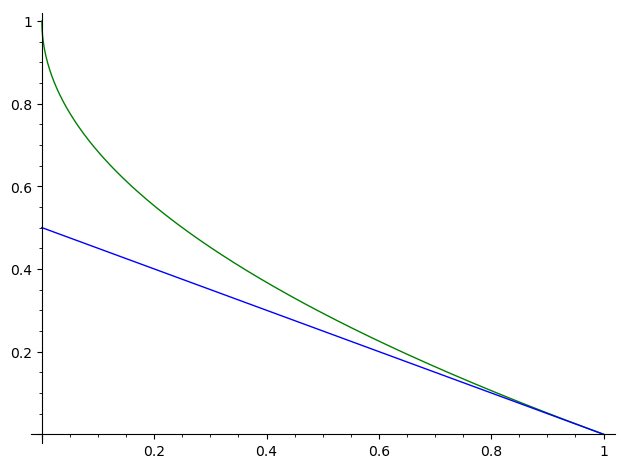

In [18]:


# Plot for comparsion between PGZ decoding and SG decoding
u = var('x')
SG = plot(1-sqrt(u), (u,0,1),color='green')
PGZ = plot((1-u)/2, (u, 0, 1),color='blue')

SG + PGZ

